In [32]:
#IMPORT LIBRARIES
import pandas as pd
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
plt.style.use('seaborn')

<ipython-input-32-3d0177306bd9>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [33]:
#READ BITCOIN PRICE DATA
df = pd.read_csv('/BTC-USD.csv')
#SET THE INDEX TO BE DATE
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace =True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [34]:
#CREATE LISTS TO STORE THE DAILY SIMPLE RETURNS (DSR) FOR EACH DAY
Mon = []
Tues = []
Wed = []
Thurs = []
Fri = []
Sat = []
Sun = []

In [35]:
#CREATE A FUNCTION THAT GETS THE DAILY SIMPLE RETURN (DSR) FOR EACH DAY AND APPEND IT TO CORRESPONDING LIST
def get_dsr(day,dsr):
  if day == 'Monday':
    Mon.append(float(dsr))
  elif day == 'Tuesday':
    Tues.append(float(dsr))
  elif day == 'Wednesday':
    Wed.append(float(dsr))
  elif day == 'Thursday':
    Thurs.append(float(dsr))
  elif day == 'Friday':
    Fri.append(float(dsr))
  elif day == 'Saturday':
    Sat.append(float(dsr))
  elif day == 'Sunday':
    Sun.append(float(dsr))
  else:
    print('smth is wrong')

In [36]:
#CALCULATE AND SHOW THE DAILY SIMPLE RETURN
DSR = df['Close'].pct_change(1)
#CREATE A NEW COLUMN TO HOLD THE DAILY SIMPLE RETURN
df['DSR'] = DSR
#SHOW DATA WITH DSR
df.head()

,Open,High,Low,Close,Adj Close,Volume,DSR
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,-0.071926
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,-0.069843
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,0.035735
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,-0.024659


In [37]:
#DROP 2014-09-17 SINCE DSR IS NAN
df.drop(index='2014-09-17',inplace =True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,DSR
Date,,,,,,,
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,-0.071926
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,-0.069843
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,0.035735
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,-0.024659
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600,0.008352


In [38]:
# df.tail()

In [39]:
#CREATE A LOOP TO GATHER THE DAILY SIMPLE RETURNS OF EACH DAY FROM THE DATA SET
for i in range(0,len(df)):
  df_dsr = df['DSR'][i]
  curr_date = df.index[i]
  df_weekday = calendar.day_name[curr_date.weekday()]
  # print(curr_date, df_weekday)
  #ADD THE DAILY SIMPLE RETURN TO CORRESPONDING LIST FOR THAT DAY
  get_dsr(df_weekday,df_dsr)


  

In [40]:
#CREATE A FUNCTION TO AVERAGE THE RETURNS OF EACH DAY
def AVG(day):
  if not day:
    print('smth wrong')
    return [0]
  else:
    return [sum(day)/len(day)]

In [41]:
#CREATE A NEW DATAFRAME AND SETTHE INDEX TO BE THE DAYS OF THE WEEK
df_returns = pd.DataFrame(index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
#GET THE AVERAGE FOR EACH DAY AND ADD THE VALUES UNDER.A NEW CREATED COLUMN 'AVG'
df_returns['AVG'] = AVG(Mon)+AVG(Tues)+AVG(Wed)+AVG(Thurs)+AVG(Fri)+AVG(Sat)+AVG(Sun)

<Axes: >

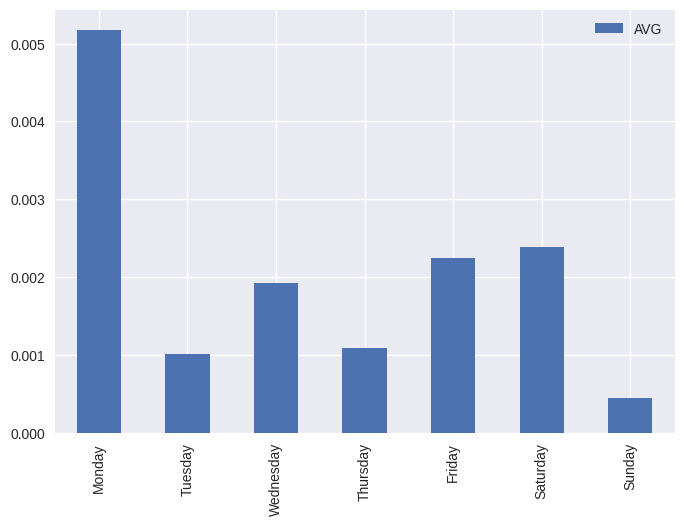

In [42]:
#PLOT THE AVERAGE DAILY SIMPLE RETURNS
df_returns.plot.bar()

In [48]:
#SHOW THE RETURN VALUES 
df_returns


,AVG
Monday,0.005178
Tuesday,0.001016
Wednesday,0.001930
Thursday,0.001086
Friday,0.002252
Saturday,0.002386
Sunday,0.000445


In [49]:
# GET THE DAY WITH THE MAXIMUM RETURN
max_return_day = df_returns['AVG'].idxmax()
print(f"The best weekday to invest on this instance is {max_return_day}")

The best weekday to invest on this instance is Monday
